In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
renda = pd.read_csv('previsao.csv')
renda.drop(['Unnamed: 0','index'], axis=1, inplace=True)

In [3]:
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
renda.tail()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14999,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

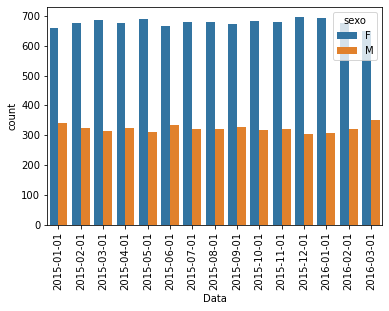

In [5]:
bar = sns.countplot(x=renda['data_ref'],  hue = renda['sexo'], data=renda)
plt.xlabel('Data')
plt.xticks(rotation=90)

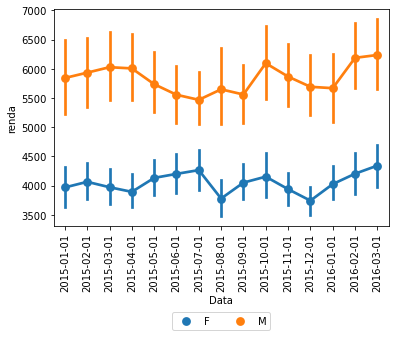

In [44]:
bar1 = sns.pointplot(x=renda['data_ref'], y=renda['renda'],  hue = renda['sexo'], data=renda)
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5),ncol = 2)

Renda do publico masculino bem mais alta do que do publico feminino

In [50]:
bar2 = pd.crosstab(renda['data_ref'], renda['sexo'], normalize='index' )

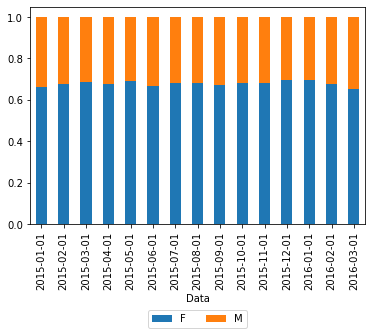

In [51]:
_ = bar2.plot.bar(stacked = True)
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5),ncol = 2)


Barras empilhadas

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [25]:
renda.info()# todos os objetos com o tipo de dados  bool serão avaliados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

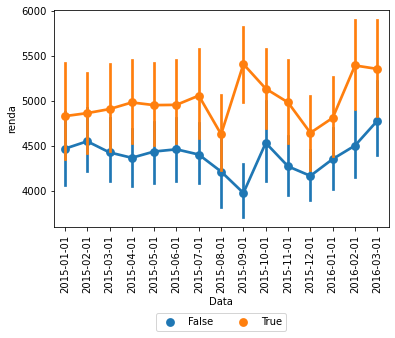

In [26]:
var1 = sns.pointplot (x='data_ref', y='renda',  hue ='posse_de_veiculo', data=renda, ci = 95)
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5),ncol = 2)

Vemos que na data 01-08-2015, é o periodo onde há a maior diferença de renda, e onde da para perceber que , só os que tinham a renda acima de 5000 tinha carro, parece um bom indicativo, com uma confiabilidade de 95%

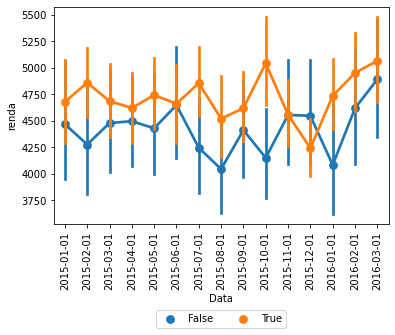

In [27]:
var2= sns.pointplot (x='data_ref', y='renda',  hue ='posse_de_imovel', data=renda, ci = 95)
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5),ncol = 2)

vemos que os dados se entralaçam em quase toda linha do tempo, tendo uma diferença em uma única data, como o gráfico anterior, aqui a data que define bem a faixa de renda para ter imovel é na data 01-10-2015

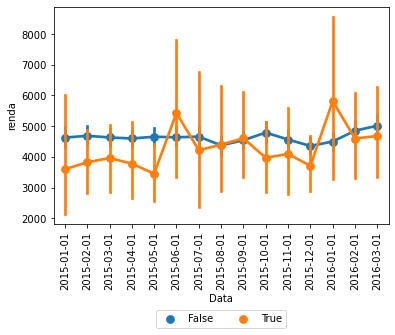

In [28]:
var3= sns.pointplot (x='data_ref', y='renda',  hue ='mau', data=renda, ci = 95)
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5),ncol = 2)

Com esse gráfico, como em todas as datas de referência os dados se entrelaçam, fica complicado uma análise boa neste primeiro momento, não faz muito sentido utiliza o parâmetro 'mau' mescaldo com data de referência e renda.